# Importing The Libraries


In [4]:
# Importing the pandas module for data manipulation and analysis
import pandas as pd

# Importing the NumPy module for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, and selecting
import numpy as np

# Importing the pyplot module from Matplotlib for creating a variety of charts and plots
import matplotlib.pyplot as plt

# Import the seaborn library as "sns" for data visualization and statistical analysis
import seaborn as sns


# Importing the dataset

In [5]:
dataset = pd.read_csv('Airlines.csv')


# Return the first 5 rows of the dataset

In [6]:
dataset.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


# Return the last 5 rows of the dataset

In [7]:
dataset.tail()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1
539382,539383,US,1442,LAX,PHL,5,1439,301,1


# Choosing the top 160,000 rows and loading the dataset.

In [9]:
dataset = dataset.head(160000)

dataset

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15.0,205.0,1
1,2,US,1558,PHX,CLT,3,15.0,222.0,1
2,3,AA,2400,LAX,DFW,3,20.0,165.0,1
3,4,AA,2466,SFO,DFW,3,20.0,195.0,1
4,5,AS,108,ANC,SEA,3,30.0,202.0,0
...,...,...,...,...,...,...,...,...,...
159995,159996,9E,3949,DTW,MLI,5,540.0,94.0,0
159996,159997,9E,3970,MEM,CMH,5,540.0,106.0,0
159997,159998,9E,3974,DTW,IND,5,540.0,83.0,0
159998,159999,9E,4388,DTW,MSN,5,540.0,87.0,0


# Discovering Data

In [10]:
dataset.dtypes


id               int64
Airline         object
Flight           int64
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Time           float64
Length         float64
Delay            int64
dtype: object

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           160000 non-null  int64  
 1   Airline      160000 non-null  object 
 2   Flight       160000 non-null  int64  
 3   AirportFrom  160000 non-null  object 
 4   AirportTo    160000 non-null  object 
 5   DayOfWeek    160000 non-null  int64  
 6   Time         159990 non-null  float64
 7   Length       159990 non-null  float64
 8   Delay        160000 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 11.0+ MB


In [12]:
dataset.shape

(160000, 9)

In [13]:
dataset.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

In [14]:
dataset.isnull().sum()


id              0
Airline         0
Flight          0
AirportFrom     0
AirportTo       0
DayOfWeek       0
Time           10
Length         10
Delay           0
dtype: int64

# Handling Missing Data

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

dataset[['Time', 'Length']] = imputer.fit_transform(dataset[['Time', 'Length']])

# Exploratory Data Analysis

### Flight Delay Distribution by Airline


<Axes: xlabel='Airline', ylabel='count'>

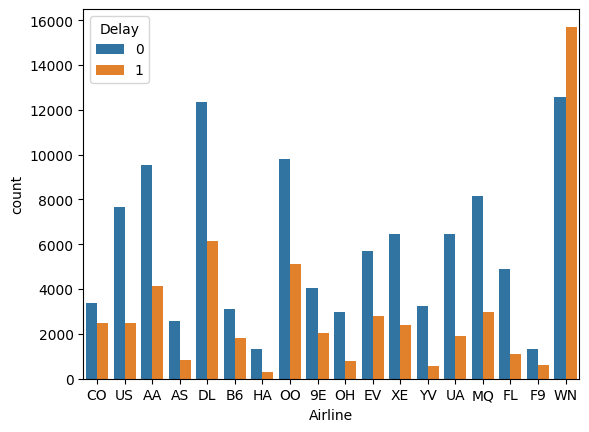

In [16]:
# Show the count of flights categorized as delayed or not delayed by each airline.
sns.countplot(data=dataset, x='Airline', hue='Delay')

### Flight Lengths by Airline


<Axes: xlabel='Airline', ylabel='Length'>

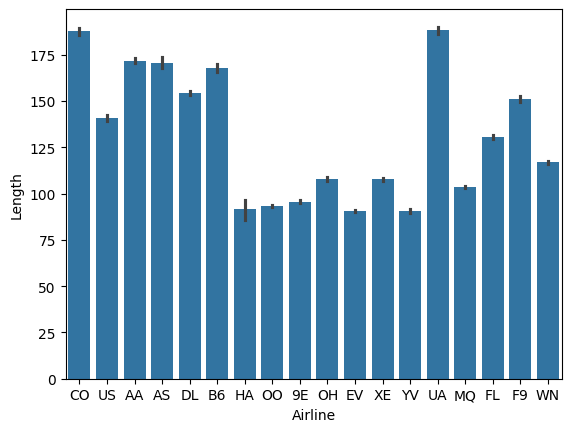

In [17]:
# The average flight length varies among airlines
sns.barplot(data=dataset, x='Airline', y='Length')


### Flight Frequency by Day of the Week



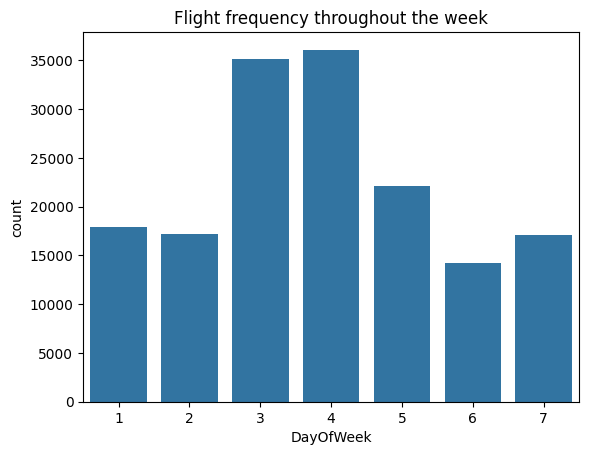

In [18]:
#Flight frequency throughout the week
DayOfWeekOrder = list(range(1,8))
sns.countplot(x='DayOfWeek',data=dataset,order=DayOfWeekOrder).set(title='Flight frequency throughout the week');

### Flight Delay Proportion by Day of the Week



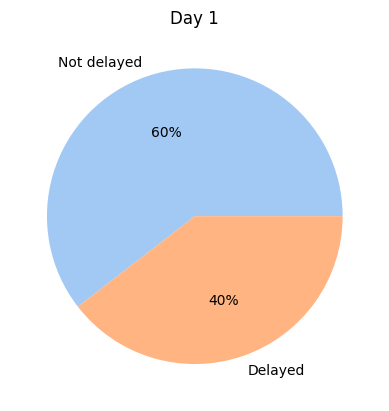

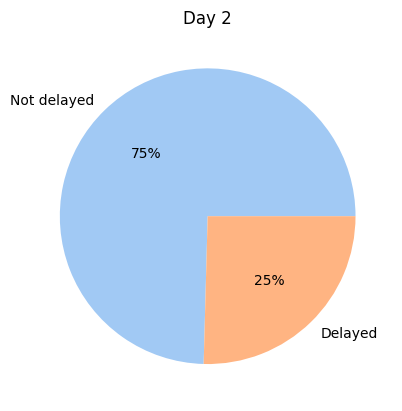

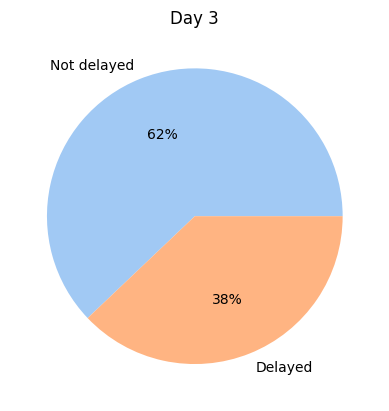

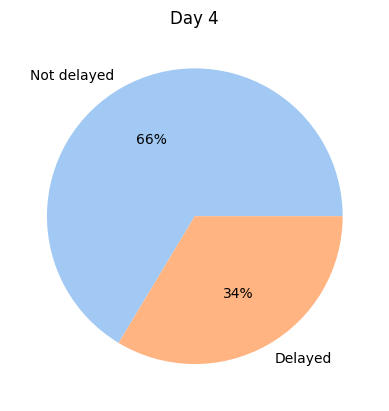

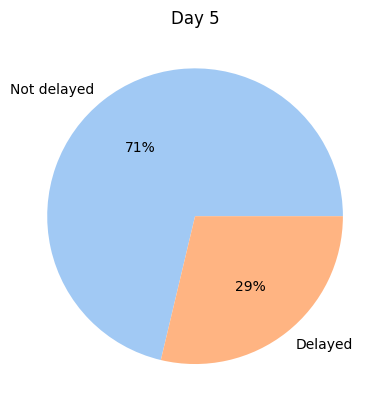

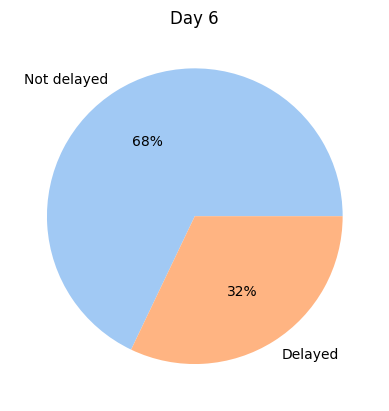

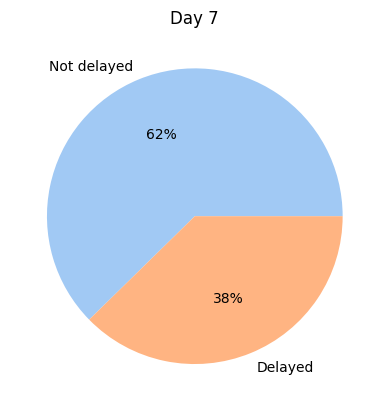

In [19]:
#Day of week vs Flight being delayed
a = dataset.groupby(['DayOfWeek','Delay']).count().unstack('Delay')['Time']
for i in range(a.shape[0]):
    numOfFlights = a.iloc[i,0]+a.iloc[i,1]
    for j in [0,1]:
        a.iloc[i,j] = a.iloc[i,j]/numOfFlights

#set labels for pie chart
pieChartLabels = ['Not delayed','Delayed']
#define Seaborn color palette to use
myColors = sns.color_palette('pastel')[0:5]
#display pie charts for the whole week   
for i in range(1,8):
    b = a.iloc[i-1,:]
    #create pie chart
    plt.pie(b, labels = pieChartLabels, colors = myColors, autopct='%.0f%%')
    plt.title('Day ' + str(i))
    plt.show()

### Airlines with the Most Delayed Flights



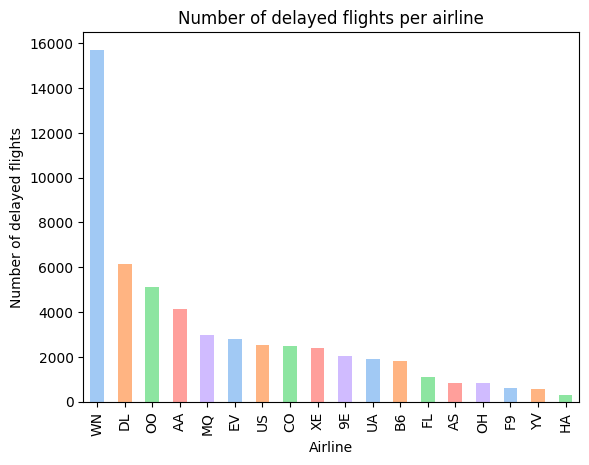

In [20]:
#We will now look at which airlines had the most delayed flights
c = dataset.groupby('Airline').sum()['Delay'].sort_values(ascending=False)
c.plot(kind='bar',color=myColors)
plt.ylabel('Number of delayed flights')
plt.title('Number of delayed flights per airline')
plt.show()

# Checking for imbalance

In [21]:
x_check = dataset.drop(['Delay'],axis=1)
y_check = dataset['Delay']

In [22]:
y_check.value_counts()

Delay
0    105672
1     54328
Name: count, dtype: int64

<Axes: ylabel='count'>

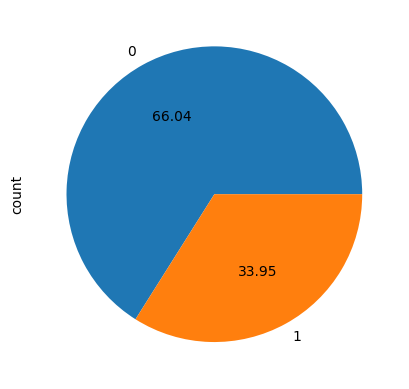

In [23]:
y_check.value_counts().plot.pie(autopct = '%0.2f')

# Undersampling

In [24]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
x_res , y_res = rus.fit_resample(x_check,y_check)

# ax = y_res.value_counts().plot.pie(autopct = '%0.2f')

In [25]:
y_res.value_counts()

Delay
0    54328
1    54328
Name: count, dtype: int64

<Axes: ylabel='count'>

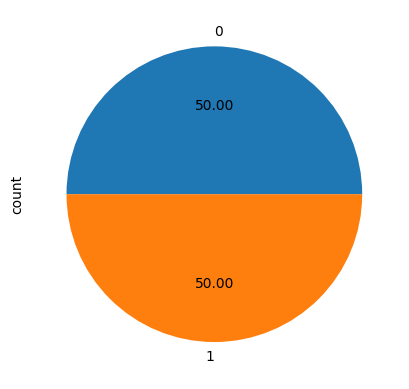

In [26]:
y_res.value_counts().plot.pie(autopct = '%0.2f')

# Extracting the independent variables (input variables) and dependent variables (output variables)

In [27]:
# Extracting the independent variables from the dataset, excluding the first and last columns
x = dataset.iloc[:, :-1].values

# Extracting the dependent variable from the last column of the dataset
y = dataset.iloc[:, -1].values

In [28]:
print(x)

[[1 'CO' 269 ... 3 15.0 205.0]
 [2 'US' 1558 ... 3 15.0 222.0]
 [3 'AA' 2400 ... 3 20.0 165.0]
 ...
 [159998 '9E' 3974 ... 5 540.0 83.0]
 [159999 '9E' 4388 ... 5 540.0 87.0]
 [160000 'AA' 1394 ... 5 540.0 155.0]]


In [29]:
print(y)

[1 1 1 ... 0 0 0]


# Splitting the dataset into the Training set and Test set

In [30]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# x: Input data features
# y: Target labels
# test_size: Proportion of data for testing (0.2 means 20%)
# random_state: Random seed for shuffling (0 for reproducibility)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [31]:
print(x_train)

[[85961 'F9' 496 ... 1 375.0 202.0]
 [62558 'WN' 1800 ... 6 855.0 145.0]
 [78621 'MQ' 2905 ... 7 930.0 70.0]
 ...
 [152316 'AS' 755 ... 4 1080.0 268.0]
 [117953 'FL' 917 ... 2 1139.0 124.0]
 [43568 'OO' 6426 ... 5 737.0 49.0]]


In [32]:
print(x_test)

[[100597 'FL' 185 ... 1 1139.0 131.0]
 [92146 'AA' 2344 ... 1 690.0 135.0]
 [5653 'WN' 3505 ... 3 630.0 90.0]
 ...
 [5425 'MQ' 3225 ... 3 620.0 130.0]
 [29669 'XE' 2346 ... 4 960.0 101.0]
 [15405 'OH' 6536 ... 3 1155.0 119.0]]


In [33]:
print(y_train)

[0 1 0 ... 0 0 0]


In [34]:
print(y_test)

[1 1 1 ... 0 0 0]


# Encoding categorical data

### Encoding the Independent Variable


In [35]:
# Import the LabelEncoder and ColumnTransformer from sklearn.preprocessing and sklearn.compose
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

# Assuming x_train and x_test are your input datasets

# Specify the columns to be label encoded - In this case, columns 0, 2, and 3
columns_to_encode = [1, 3, 4]

# Create a ColumnTransformer object with a LabelEncoder for specified columns and a passthrough for other columns
ct_obj = ColumnTransformer(
    transformers=[("encoder", "passthrough", columns_to_encode)],
    remainder="passthrough"
)

# Apply the ColumnTransformer to the training set and transform the specified columns using LabelEncoder
for col in columns_to_encode:
    le = LabelEncoder()
    x_train[:, col] = le.fit_transform(x_train[:, col])

# Apply the ColumnTransformer to the testing set and transform the specified columns using the same LabelEncoder
for col in columns_to_encode:
    le = LabelEncoder()
    x_test[:, col] = le.fit_transform(x_test[:, col])


In [36]:
print(x_train)

[[85961 7 496 ... 1 375.0 202.0]
 [62558 15 1800 ... 6 855.0 145.0]
 [78621 10 2905 ... 7 930.0 70.0]
 ...
 [152316 2 755 ... 4 1080.0 268.0]
 [117953 8 917 ... 2 1139.0 124.0]
 [43568 12 6426 ... 5 737.0 49.0]]


In [37]:
print(x_test)

[[100597 8 185 ... 1 1139.0 131.0]
 [92146 1 2344 ... 1 690.0 135.0]
 [5653 15 3505 ... 3 630.0 90.0]
 ...
 [5425 10 3225 ... 3 620.0 130.0]
 [29669 16 2346 ... 4 960.0 101.0]
 [15405 11 6536 ... 3 1155.0 119.0]]


# Feature Scaling

In [38]:
# Import the StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
sc = StandardScaler()

# Apply the StandardScaler to the training set, centering and scaling the features to a mean of 0 and a variance of 1
x_train = sc.fit_transform(x_train)

# Apply the StandardScaler to the testing set using the same parameters learned from the training set
x_test = sc.transform(x_test)

In [39]:
print(x_train)

[[ 0.13067535 -0.44275638 -0.93535148 ... -1.6293897  -1.50336931
   1.0367204 ]
 [-0.37604638  1.06950675 -0.3071515  ...  1.21011856  0.21857409
   0.21190017]
 [-0.02825032  0.12434229  0.22518054 ...  1.77802021  0.48762775
  -0.8733896 ]
 ...
 [ 1.56739372 -1.38792084 -0.81057864 ...  0.07431526  1.02573506
   1.9917754 ]
 [ 0.82336609 -0.25372349 -0.73253539 ... -1.06148805  1.23739061
  -0.09198096]
 [-0.78721784  0.50240807  1.92141683 ...  0.64221691 -0.20473699
  -1.17727074]]


In [40]:
print(x_test)

[[ 0.447574   -0.25372349 -1.08517525 ... -1.6293897   1.23739061
   0.00931275]
 [ 0.26459296 -1.57695373 -0.04508035 ... -1.6293897  -0.37334395
   0.06719487]
 [-1.60815337  1.06950675  0.51422961 ... -0.4935864  -0.58858688
  -0.58397899]
 ...
 [-1.61309002  0.12434229  0.37934004 ... -0.4935864  -0.6244607
  -0.00515778]
 [-1.08815897  1.25853964 -0.04411685 ...  0.07431526  0.59524921
  -0.42480316]
 [-1.39700308  0.31337518  1.97440916 ... -0.4935864   1.29478872
  -0.16433362]]


# Training the SVM model on the Training set

In [41]:
# Import the SVC class from sklearn.svm
from sklearn.svm import SVC

# Initialize an SVC classifier with specific parameters:
# C: Regularization parameter (default=1)
# kernel: Kernel function ('linear' in this case)
# random_state: Random seed for reproducibility (0 in this case)
classifier = SVC(C=1, kernel='linear', random_state=0)

# Train the SVC classifier using the training data features (x_train) and labels (y_train)
classifier.fit(x_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

# Predicting the Test set results

In [42]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 1]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Calculating the Accuracy

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.66115625

# Applying Random Search + K-Fold Cross Valdiation to find the best model hyper-parameters


In [48]:
from sklearn.model_selection import RandomizedSearchCV

# Define a dictionary of parameter distributions for the search:
param_distributions = {
    'C': [0.1, 1, 10, 100],  # Uniform distribution for C
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Discrete distribution for kernel
}

# Create a RandomizedSearchCV object:
random_search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_distributions,
    scoring='accuracy',
    cv=5,
    n_iter=16,  # Number of parameter combinations to try
    random_state=0,  # Random seed for reproducibility
)

# Perform the randomized search:
random_search.fit(x_train, y_train)

# Get the best parameters found by the search:
best_params = random_search.best_params_

# Print the best parameters:
print("Best parameters:", best_params)

# Fit the model using the best hyper-parameters

# Evaluate the model

In [44]:
from sklearn.metrics import accuracy_score , recall_score, precision_score,f1_score, roc_curve,auc,confusion_matrix, ConfusionMatrixDisplay, classification_report


In [45]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80     21157
           1       0.00      0.00      0.00     10843

    accuracy                           0.66     32000
   macro avg       0.33      0.50      0.40     32000
weighted avg       0.44      0.66      0.53     32000



c:\Users\PC\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# Caluclate the performance metrics
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Recall : ",recall_score(y_test, y_pred,pos_label=0))
print("Precision: ", precision_score(y_test, y_pred,pos_label=0))
print("F1-score: ", f1_score(y_test, y_pred,pos_label=0))

Accuracy :  0.66115625
Recall :  1.0
Precision:  0.66115625
F1-score:  0.7960193389393684


In [47]:
# Plotting the ROC curve and calculating the AUC
# get false and true positive rates
y_pred_prob=classifier.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
print ("AUC: ",roc_auc)
# plot ROC curve
plt.plot(fpr, tpr, color='green')
plt.title('ROC Curve ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

AttributeError: predict_proba is not available when probability=False

In [48]:
print(confusion_matrix(y_test, y_pred))

[[21157     0]
 [10843     0]]


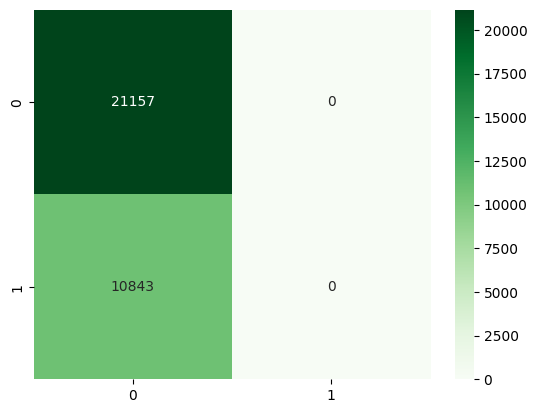

In [49]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", cmap="Greens");